In [1]:
import pandas as pd
df = pd.read_feather(f'data/nyc_buses_with_passenger_counts_20210401_20210630_citywide_features.feather')

In [2]:
# fix next stop id
df['next_stop_id_cleaned'] = df['next_stop_id_cleaned'].astype(int)

# one-hot encode route_short

In [3]:
# https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
df = pd.concat([df,pd.get_dummies(df['route_short'], prefix='route_short_')],axis=1)

In [4]:
# # one-hot encode next_stop_id (omitted not enough RAM)
# # https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
# df = pd.concat([df,pd.get_dummies(df['next_stop_id_cleaned'], prefix='stop_id_')],axis=1)

In [5]:
# fix vehicle_id
df['vehicle_id'] = df['vehicle_id'].astype(int)
cols = df.columns.tolist()

In [6]:
[x for x in cols]

['route_short',
 'vehicle_id',
 'month',
 'week',
 'day',
 'hour',
 'day_of_week',
 'is_weekend',
 'day_of_week_sin',
 'day_of_week_cos',
 'hour_norm',
 'hour_cos',
 'hour_sin',
 'cluster_id',
 'lat',
 'lon',
 'direction',
 'next_stop_id_cleaned',
 'next_stop_d',
 'next_stop_d_along_route',
 'passenger_count',
 'route_short__B1',
 'route_short__B11',
 'route_short__B12',
 'route_short__B13',
 'route_short__B14',
 'route_short__B15',
 'route_short__B16',
 'route_short__B17',
 'route_short__B2',
 'route_short__B20',
 'route_short__B24',
 'route_short__B25',
 'route_short__B26',
 'route_short__B3',
 'route_short__B31',
 'route_short__B32',
 'route_short__B35',
 'route_short__B36',
 'route_short__B37',
 'route_short__B38',
 'route_short__B39',
 'route_short__B4',
 'route_short__B41',
 'route_short__B42',
 'route_short__B43',
 'route_short__B44',
 'route_short__B45',
 'route_short__B46',
 'route_short__B47',
 'route_short__B48',
 'route_short__B49',
 'route_short__B52',
 'route_short__B54',

# train-test split

In [7]:
base_train_columns = ['vehicle_id',
 'month',
 'week',
 'day',
 'hour',
 'day_of_week',
 'is_weekend',
 'day_of_week_sin',
 'day_of_week_cos',
 'hour_norm',
 'hour_cos',
 'hour_sin',
 'cluster_id',
 'utm_x',
 'utm_y',
 'direction',
 'next_stop_id_cleaned',
 'next_stop_d',
 'next_stop_d_along_route',
 'route_short__B1',
 'route_short__B11',
 'route_short__B12',
 'route_short__B13',
 'route_short__B14',
 'route_short__B15',
 'route_short__B16',
 'route_short__B17',
 'route_short__B2',
 'route_short__B20',
 'route_short__B24',
 'route_short__B25',
 'route_short__B26',
 'route_short__B3',
 'route_short__B31',
 'route_short__B32',
 'route_short__B35',
 'route_short__B36',
 'route_short__B37',
 'route_short__B38',
 'route_short__B39',
 'route_short__B4',
 'route_short__B41',
 'route_short__B42',
 'route_short__B43',
 'route_short__B44',
 'route_short__B45',
 'route_short__B46',
 'route_short__B47',
 'route_short__B48',
 'route_short__B49',
 'route_short__B52',
 'route_short__B54',
 'route_short__B57',
 'route_short__B6',
 'route_short__B60',
 'route_short__B61',
 'route_short__B62',
 'route_short__B63',
 'route_short__B64',
 'route_short__B65',
 'route_short__B67',
 'route_short__B68',
 'route_short__B69',
 'route_short__B7',
 'route_short__B70',
 'route_short__B74',
 'route_short__B8',
 'route_short__B82',
 'route_short__B83',
 'route_short__B84',
 'route_short__B9',
 'route_short__B99',
 'route_short__Bx1',
 'route_short__Bx10',
 'route_short__Bx11',
 'route_short__Bx12',
 'route_short__Bx13',
 'route_short__Bx15',
 'route_short__Bx16',
 'route_short__Bx17',
 'route_short__Bx18',
 'route_short__Bx19',
 'route_short__Bx2',
 'route_short__Bx20',
 'route_short__Bx21',
 'route_short__Bx22',
 'route_short__Bx24',
 'route_short__Bx26',
 'route_short__Bx27',
 'route_short__Bx28',
 'route_short__Bx29',
 'route_short__Bx3',
 'route_short__Bx30',
 'route_short__Bx31',
 'route_short__Bx32',
 'route_short__Bx33',
 'route_short__Bx34',
 'route_short__Bx35',
 'route_short__Bx36',
 'route_short__Bx38',
 'route_short__Bx39',
 'route_short__Bx4',
 'route_short__Bx40',
 'route_short__Bx41',
 'route_short__Bx42',
 'route_short__Bx46',
 'route_short__Bx4A',
 'route_short__Bx5',
 'route_short__Bx6',
 'route_short__Bx7',
 'route_short__Bx8',
 'route_short__Bx9',
 'route_short__Bx99',
 'route_short__M1',
 'route_short__M10',
 'route_short__M100',
 'route_short__M101',
 'route_short__M102',
 'route_short__M103',
 'route_short__M104',
 'route_short__M106',
 'route_short__M11',
 'route_short__M116',
 'route_short__M12',
 'route_short__M15',
 'route_short__M2',
 'route_short__M20',
 'route_short__M21',
 'route_short__M22',
 'route_short__M3',
 'route_short__M31',
 'route_short__M35',
 'route_short__M4',
 'route_short__M42',
 'route_short__M5',
 'route_short__M50',
 'route_short__M55',
 'route_short__M57',
 'route_short__M66',
 'route_short__M7',
 'route_short__M72',
 'route_short__M8',
 'route_short__M9',
 'route_short__M96',
 'route_short__M98',
 'route_short__M99',
 'route_short__Q1',
 'route_short__Q12',
 'route_short__Q13',
 'route_short__Q15',
 'route_short__Q15A',
 'route_short__Q16',
 'route_short__Q17',
 'route_short__Q2',
 'route_short__Q20A',
 'route_short__Q20B',
 'route_short__Q24',
 'route_short__Q26',
 'route_short__Q27',
 'route_short__Q28',
 'route_short__Q3',
 'route_short__Q30',
 'route_short__Q31',
 'route_short__Q32',
 'route_short__Q36',
 'route_short__Q4',
 'route_short__Q42',
 'route_short__Q43',
 'route_short__Q46',
 'route_short__Q48',
 'route_short__Q5',
 'route_short__Q54',
 'route_short__Q55',
 'route_short__Q56',
 'route_short__Q58',
 'route_short__Q59',
 'route_short__Q76',
 'route_short__Q77',
 'route_short__Q83',
 'route_short__Q84',
 'route_short__Q85',
 'route_short__Q88',
 'route_short__S40',
 'route_short__S42',
 'route_short__S44',
 'route_short__S46',
 'route_short__S48',
 'route_short__S51',
 'route_short__S52',
 'route_short__S53',
 'route_short__S54',
 'route_short__S55',
 'route_short__S56',
 'route_short__S57',
 'route_short__S59',
 'route_short__S61',
 'route_short__S62',
 'route_short__S66',
 'route_short__S74',
 'route_short__S76',
 'route_short__S78',
 'route_short__S81',
 'route_short__S84',
 'route_short__S86',
 'route_short__S89',
 'route_short__S90',
 'route_short__S91',
 'route_short__S92',
 'route_short__S93',
 'route_short__S94',
 'route_short__S96',
 'route_short__S98',
 'route_short__SIM1',
 'route_short__SIM10',
 'route_short__SIM11',
 'route_short__SIM15',
 'route_short__SIM1C',
 'route_short__SIM2',
 'route_short__SIM22',
 'route_short__SIM25',
 'route_short__SIM26',
 'route_short__SIM3',
 'route_short__SIM30',
 'route_short__SIM31',
 'route_short__SIM32',
 'route_short__SIM33',
 'route_short__SIM33C',
 'route_short__SIM34',
 'route_short__SIM35',
 'route_short__SIM3C',
 'route_short__SIM4',
 'route_short__SIM4C',
 'route_short__SIM4X',
 'route_short__SIM5',
 'route_short__SIM6',
 'route_short__SIM7',
 'route_short__SIM8',
 'route_short__SIM8X',
 'route_short__SIM9',
 'route_short__X27',
 'route_short__X28',
 'route_short__X37',
 'route_short__X38',
 'route_short__X63',
 'route_short__X64',
 'route_short__X68']

In [8]:
df = df.drop('route_short', axis=1)

In [9]:
# look at count by week #
df.groupby('week').size()

week
17      4898
18    448844
19    500512
20    510184
21    503450
22    466044
23    491715
24    499244
25    502471
26    243760
dtype: int64

In [10]:
# df_test = df[ (df.month >= 4 ) &  (df.month <= 5)]
df_test = df[ (df.week >= 18 ) &  (df.week <= 23)]

df_train = df[~df.index.isin(df_test.index)]

(df_train.shape, df_test.shape)

((1250373, 247), (2920749, 247))

In [11]:
X_train_base = df_train[base_train_columns]
y_train_base = df_train.passenger_count

X_test_base = df_test[base_train_columns]
y_test_base = df_test.passenger_count

X_train_base.shape, y_train_base.shape, X_test_base.shape, y_test_base.shape

((1250373, 246), (1250373,), (2920749, 246), (2920749,))

In [12]:
X_train_base

,vehicle_id,month,week,day,hour,day_of_week,is_weekend,day_of_week_sin,day_of_week_cos,hour_norm,...,route_short__SIM8,route_short__SIM8X,route_short__SIM9,route_short__X27,route_short__X28,route_short__X37,route_short__X38,route_short__X63,route_short__X64,route_short__X68
1,7334,6,24,16,7,2,False,0.974928,-0.222521,1.912274,...,0,0,0,0,0,0,0,0,0,0
2,8671,6,25,26,18,5,True,-0.974928,-0.222521,4.917275,...,0,0,0,0,0,0,0,0,0,0
5,7498,6,25,27,20,6,True,-0.781831,0.623490,5.463639,...,0,0,0,0,0,0,0,0,0,0
8,6053,6,26,29,12,1,False,0.781831,0.623490,3.278184,...,0,0,0,0,0,0,0,0,0,0
9,2583,6,25,24,5,3,False,0.433884,-0.900969,1.365910,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171110,7223,6,25,25,19,4,False,-0.433884,-0.900969,5.190457,...,0,0,0,0,0,0,0,0,0,0
4171111,8275,6,24,14,8,0,False,0.000000,1.000000,2.185456,...,0,0,0,0,0,0,0,0,0,0
4171114,7260,6,24,16,5,2,False,0.974928,-0.222521,1.365910,...,0,0,0,0,0,0,0,0,0,0
4171115,7181,6,26,28,19,0,False,0.000000,1.000000,5.190457,...,0,0,0,0,0,0,0,0,0,0


# XGBoost Regression

### fit the model

In [13]:
import xgboost as xgb

# regr_base = XGBRegressor(learning_rate=0.05, max_depth=5, objective='reg:linear', n_estimators=100, colsample_bytree=0)
regr_base = xgb.XGBRegressor(learning_rate=0.007, max_depth=4, objective='reg:squarederror', n_estimators=200)

eval_set_base = [(X_train_base, y_train_base), (X_test_base, y_test_base)]

regr_base.fit(X=X_train_base, y=y_train_base, eval_metric=["rmsle", "mae"], eval_set=eval_set_base, verbose=True)

[0]	validation_0-rmsle:1.69734	validation_0-mae:8.11818	validation_1-rmsle:1.65381	validation_1-mae:7.64235
[1]	validation_0-rmsle:1.66736	validation_0-mae:8.07932	validation_1-rmsle:1.62358	validation_1-mae:7.59119
[2]	validation_0-rmsle:1.63863	validation_0-mae:8.03854	validation_1-rmsle:1.59501	validation_1-mae:7.54347
[3]	validation_0-rmsle:1.61173	validation_0-mae:8.00023	validation_1-rmsle:1.56781	validation_1-mae:7.52302
[4]	validation_0-rmsle:1.58634	validation_0-mae:7.95351	validation_1-rmsle:1.54348	validation_1-mae:7.47558
[5]	validation_0-rmsle:1.56219	validation_0-mae:7.92152	validation_1-rmsle:1.51918	validation_1-mae:7.43393
[6]	validation_0-rmsle:1.53911	validation_0-mae:7.87578	validation_1-rmsle:1.49651	validation_1-mae:7.38722
[7]	validation_0-rmsle:1.51720	validation_0-mae:7.84000	validation_1-rmsle:1.47480	validation_1-mae:7.36885
[8]	validation_0-rmsle:1.49624	validation_0-mae:7.80168	validation_1-rmsle:1.45420	validation_1-mae:7.32431
[9]	validation_0-rmsle:1.476

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.007, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Mean Average Error (MAE)

In [14]:
from sklearn.metrics import mean_absolute_error
y_pred_base = regr_base.predict(X_test_base)
mae_base = mean_absolute_error(y_test_base, y_pred_base)
round(mae_base, 3)

5.494

### Feature Importance

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # print(df)
    print(pd.DataFrame(zip(base_train_columns, regr_base.feature_importances_), columns =['column', 'value']).sort_values('value', ascending=False))

                      column     value
0                 vehicle_id  0.229466
18   next_stop_d_along_route  0.140244
16      next_stop_id_cleaned  0.110266
10                  hour_cos  0.089805
14                       lon  0.075281
4                       hour  0.056537
11                  hour_sin  0.047140
189         route_short__S53  0.034970
13                       lat  0.031889
174         route_short__Q58  0.028690
24          route_short__B15  0.022958
17               next_stop_d  0.016628
76         route_short__Bx13  0.014562
5                day_of_week  0.013982
216       route_short__SIM1C  0.011280
52          route_short__B57  0.011223
170          route_short__Q5  0.009406
12                cluster_id  0.006290
42          route_short__B42  0.005958
181         route_short__Q88  0.005877
91          route_short__Bx3  0.005876
109         route_short__Bx7  0.004799
86         route_short__Bx24  0.004400
65          route_short__B74  0.004261
67          route_short__

### Plot MAE convergence

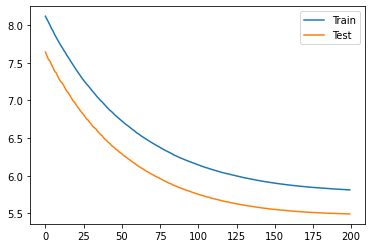

In [16]:
import matplotlib.pyplot as plt
results = regr_base.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()